In [1]:
import numpy as np
import scipy.stats
import matplotlib
import matplotlib.pyplot as plt
from elfi.examples.gauss import get_model

%matplotlib inline
%precision 2

import logging
logging.basicConfig(level=logging.INFO)

# Set an arbitrary global seed to keep the randomly generated quantities the same
seed = 1
np.random.seed(seed)

import elfi
N = 1000
fitting_steps = 25

### 1-D Gaussian model

In [2]:
true_mu_1d = [2]
cov_matrix_1d = [1]

In [3]:
m_1d = get_model(true_params=true_mu_1d, nd_mean=True, cov_matrix=cov_matrix_1d, seed_obs=seed)

In [4]:
m_1d.parameter_names

['mu_0']

In [5]:
rej_1d = elfi.Rejection(m_1d['d'], batch_size=N, seed=seed)

In [6]:
bounds_1d = {'mu_0': (-2.5, 2.5)}

In [7]:
gp_1d = elfi.GPyRegression(m_1d.parameter_names, bounds_1d)

In [8]:
prior_1d = elfi.methods.utils.ModelPrior(m_1d)

In [9]:
# acq_1d = elfi.methods.bo.acquisition.RandMaxVar(model=gp_1d, prior=prior_1d)

In [10]:
initial_evidence = 10
update_interval = 1
n_rejection_samples = 2 * initial_evidence

In [11]:
rej_result_1d = rej_1d.sample(n_samples=n_rejection_samples, quantile = 1)

Progress: |██████████████████████████████████████████████████| 100.0% Complete


In [12]:
bolfi_1d = elfi.BOLFI(m_1d, 'd', batch_size=1, initial_evidence=rej_result_1d.outputs, 
                   update_interval=update_interval, bounds=bounds_1d, seed=scipy.random.seed(), 
                   async=True, target_model=gp_1d,) 
                   # acquisition_method=acq_1d, acq_noise_var=[0.1], 
                   # batches_per_acquisition=1)

In [13]:
bolfi_1d.fit(n_evidence=fitting_steps)

INFO:elfi.methods.parameter_inference:BOLFI: Fitting the surrogate model...


Progress: |██████████████████████████████████████████████████| 100.0% Complete


INFO:elfi.methods.posteriors:Using optimized minimum value (0.0304) of the GP discrepancy mean function as a threshold


In [14]:
# bolfi_1d.plot_state()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f323b95e1d0>],
      dtype=object)

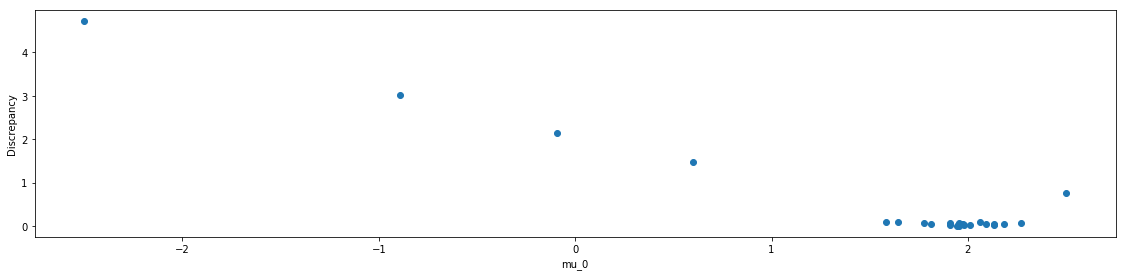

In [15]:
bolfi_1d.plot_discrepancy()

In [16]:
bolfi_1d.target_model


Name : GP regression
Objective : 2.501416635355632
Number of Parameters : 4
Number of Optimization Parameters : 4
Updates : True
Parameters:
  GP_regression.           |                  value  |  constraints  |      priors    
  sum.rbf.variance         |     1.5866418318461832  |      +ve      |  Ga(0.0011, 1) 
  sum.rbf.lengthscale      |     0.4498737382140986  |      +ve      |    Ga(1.7, 1)  
  sum.bias.variance        |     0.8872230641190942  |      +ve      |  Ga(0.00027, 1)
  Gaussian_noise.variance  |  0.0008114649314801596  |      +ve      |                

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f323f1a2c88>]],
      dtype=object)

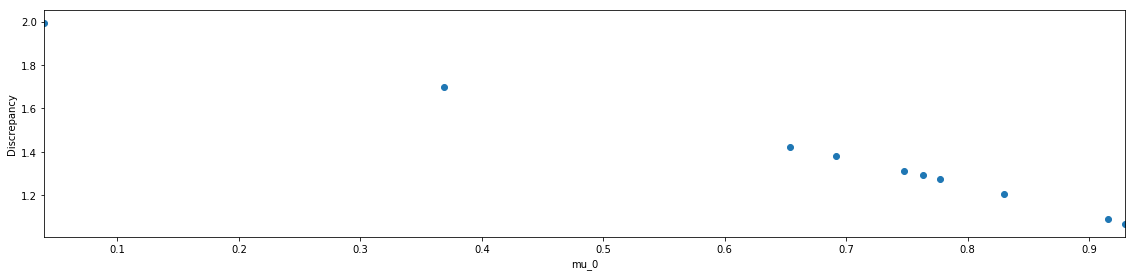

In [17]:
bolfi_1d.plot_gp()

### 2-D Gaussian model

In [18]:
true_mu_2d = [.2, .3]
cov_matrix_2d = [[.1, -.03], [-.03, .1]]

In [19]:
m_2d = get_model(true_params=true_mu_2d, nd_mean=True, cov_matrix=cov_matrix_2d, seed_obs=seed)

In [20]:
m_2d.parameter_names

['mu_0', 'mu_1']

In [21]:
bounds_2d = {'mu_0': (-.25, .25), 'mu_1': (-.5, .5)}

In [22]:
gp_2d = elfi.GPyRegression(m_2d.parameter_names, bounds_2d)

In [23]:
prior_2d = elfi.methods.utils.ModelPrior(m_2d)

In [24]:
rej_2d = elfi.Rejection(m_2d['d'], batch_size = 1)

In [25]:
rej_result_2d = rej_2d.sample(n_samples=n_rejection_samples, quantile = 1)

Progress: |██████████████████████████████████████████████████| 100.0% Complete


In [26]:
bolfi_2d = elfi.BOLFI(m_2d, 'd', batch_size=1, initial_evidence=rej_result_2d.outputs, 
                   update_interval=update_interval, bounds=bounds_2d, seed=scipy.random.seed(), 
                   async=True, target_model=gp_2d,) 
                   #acquisition_method=acq_2d, acq_noise_var=[0.1, 0.01], 
                   #batches_per_acquisition=1)

In [27]:
bolfi_2d.fit(n_evidence=fitting_steps)

INFO:elfi.methods.parameter_inference:BOLFI: Fitting the surrogate model...


Progress: |██████████████████████████████████████████████████| 100.0% Complete


INFO:elfi.methods.posteriors:Using optimized minimum value (0.2999) of the GP discrepancy mean function as a threshold


In [28]:
# bolfi_1d.plot_state()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f323b51aa58>,
      dtype=object)

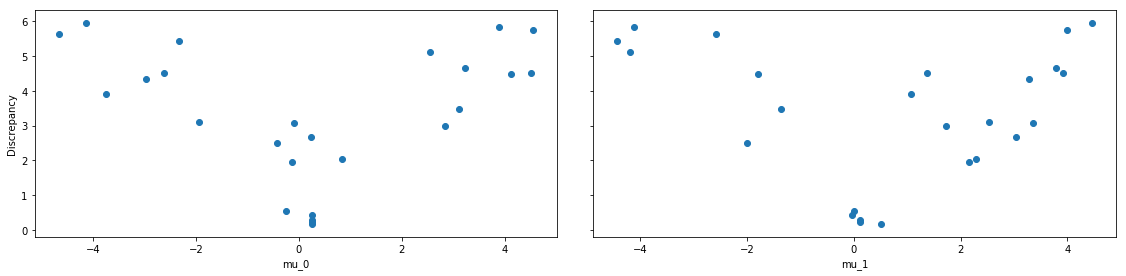

In [29]:
bolfi_2d.plot_discrepancy()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f323f1940f0>,
      dtype=object)

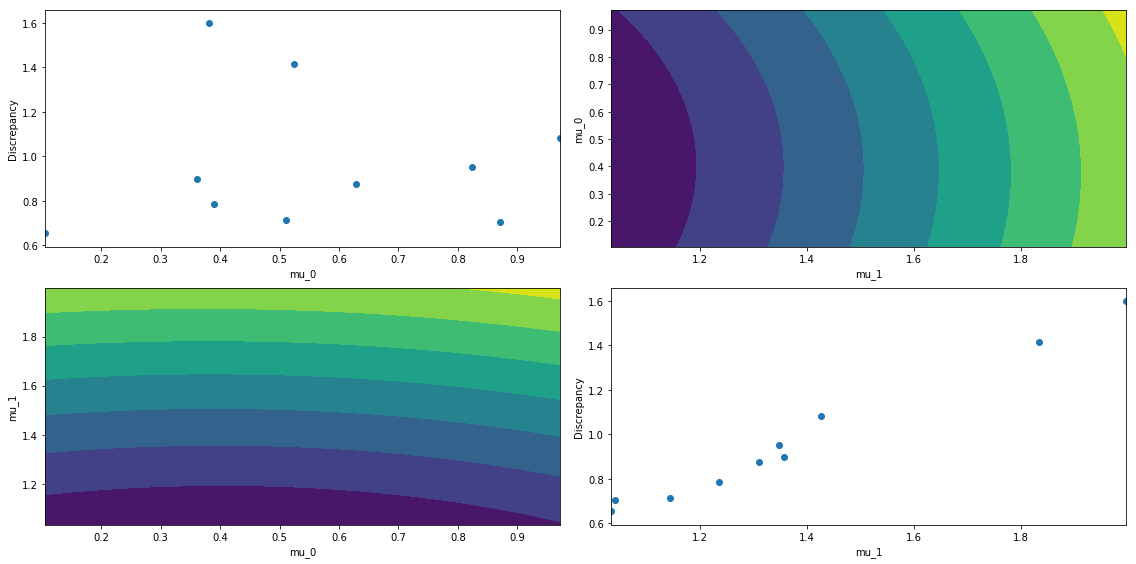

In [30]:
bolfi_2d.plot_gp()

### 3-D Gaussian model

In [31]:
true_mu_3d = [.2, .5, .6]
cov_matrix_3d = [[  .1, -.03,   .0], 
                 [-.03,   .1, -.03], 
                 [  .0, -.03,   .1]]

In [32]:
m_3d = get_model(true_params=true_mu_3d, nd_mean=True, cov_matrix=cov_matrix_3d, seed_obs=seed)

In [33]:
m_3d.parameter_names

['mu_0', 'mu_1', 'mu_2']

In [34]:
rej_3d = elfi.Rejection(m_3d['d'], batch_size=N, seed=seed)

In [35]:
bounds_3d = {'mu_0': (-.25, .25), 'mu_1': (-.55, .55), 'mu_2': (-.65, .65)}

In [36]:
gp_3d = elfi.GPyRegression(m_3d.parameter_names, bounds_3d)

In [37]:
prior_3d = elfi.methods.utils.ModelPrior(m_3d)

In [38]:
rej_result_3d = rej_3d.sample(n_samples=n_rejection_samples, quantile = 1)

Progress: |██████████████████████████████████████████████████| 100.0% Complete


In [39]:
bolfi_3d = elfi.BOLFI(m_3d, 'd', batch_size=1, initial_evidence=rej_result_3d.outputs, 
                   update_interval=update_interval, bounds=bounds_3d, seed=scipy.random.seed(), 
                   async=True, target_model=gp_3d)

In [40]:
post = bolfi_3d.fit(n_evidence=fitting_steps)

INFO:elfi.methods.parameter_inference:BOLFI: Fitting the surrogate model...


Progress: |██████████████████████████████████████████████████| 100.0% Complete


INFO:elfi.methods.posteriors:Using optimized minimum value (0.0910) of the GP discrepancy mean function as a threshold


In [41]:
# bolfi_1d.plot_state()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f323acd1518>,
      dtype=object)

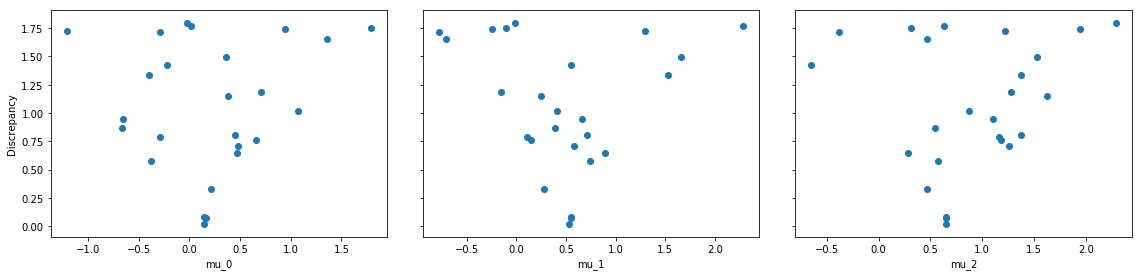

In [42]:
bolfi_3d.plot_discrepancy()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f323aba98d0>,
      dtype=object)

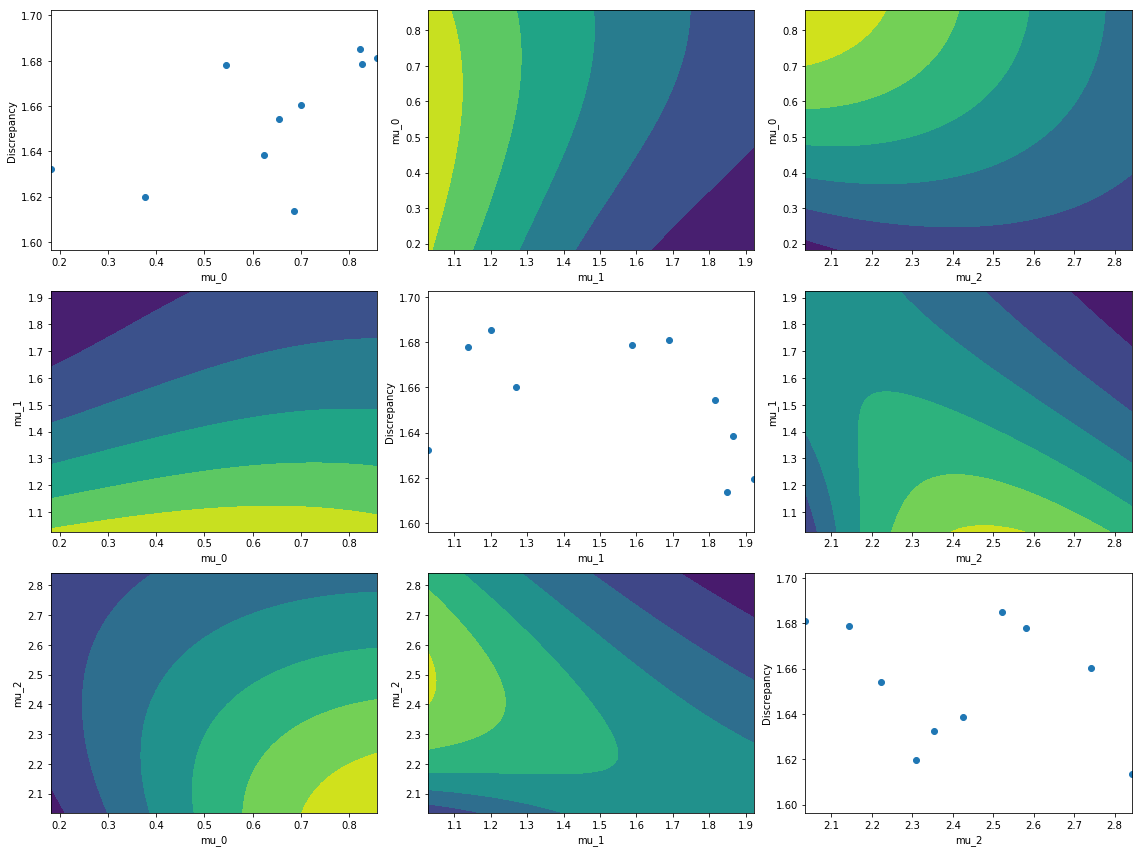

In [43]:
bolfi_3d.plot_gp()

# 4-D Gaussian model

In [44]:
true_mu_4d = [.2, .5, .6, .3]
cov_matrix_4d = [[  .1, -.03,  .03,  .03], 
                 [-.03,   .1, -.03,  .03],
                 [ .03, -.03,   .1, -.03],
                 [ .03,  .03, -.03,   .1]]

In [45]:
m_4d = get_model(true_params=true_mu_4d, nd_mean=True, cov_matrix=cov_matrix_4d, seed_obs=seed)

In [46]:
m_4d.parameter_names

['mu_0', 'mu_1', 'mu_2', 'mu_3']

In [47]:
rej_4d = elfi.Rejection(m_4d['d'], batch_size=N, seed=seed)

In [48]:
bounds_4d = {'mu_0': (-.25, .25), 'mu_1': (-.55, .55), 'mu_2': (-.65, .65), 'mu_3': (-.35, .35)}

In [49]:
gp_4d = elfi.GPyRegression(m_4d.parameter_names, bounds_4d)

In [50]:
prior_4d = elfi.methods.utils.ModelPrior(m_4d)

In [51]:
rej_result_4d = rej_4d.sample(n_samples=n_rejection_samples, quantile = 1)

Progress: |██████████████████████████████████████████████████| 100.0% Complete


In [52]:
bolfi_4d = elfi.BOLFI(m_4d, 'd', batch_size=1, initial_evidence=rej_result_4d.outputs, 
                   update_interval=update_interval, bounds=bounds_4d, seed=scipy.random.seed(), 
                   async=True, target_model=gp_4d)

In [53]:
post = bolfi_4d.fit(n_evidence=fitting_steps)

INFO:elfi.methods.parameter_inference:BOLFI: Fitting the surrogate model...


Progress: |██████████████████████████████████████████████████| 100.0% Complete


INFO:elfi.methods.posteriors:Using optimized minimum value (0.2508) of the GP discrepancy mean function as a threshold


In [54]:
# bolfi_4d.plot_state()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f323a044a90>,
      dtype=object)

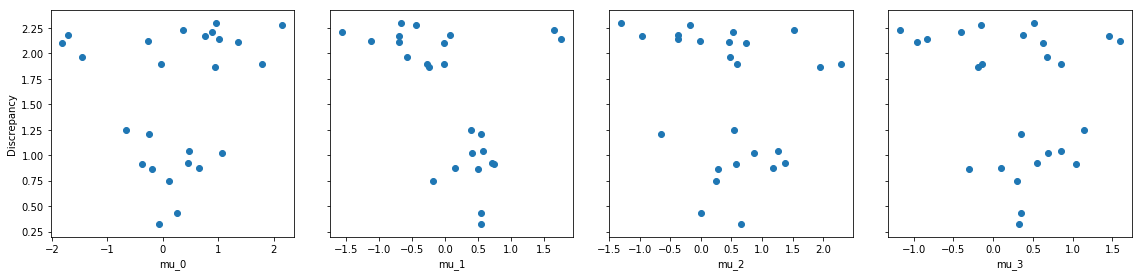

In [55]:
bolfi_4d.plot_discrepancy()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f323a47e710>,
      dtype=object)

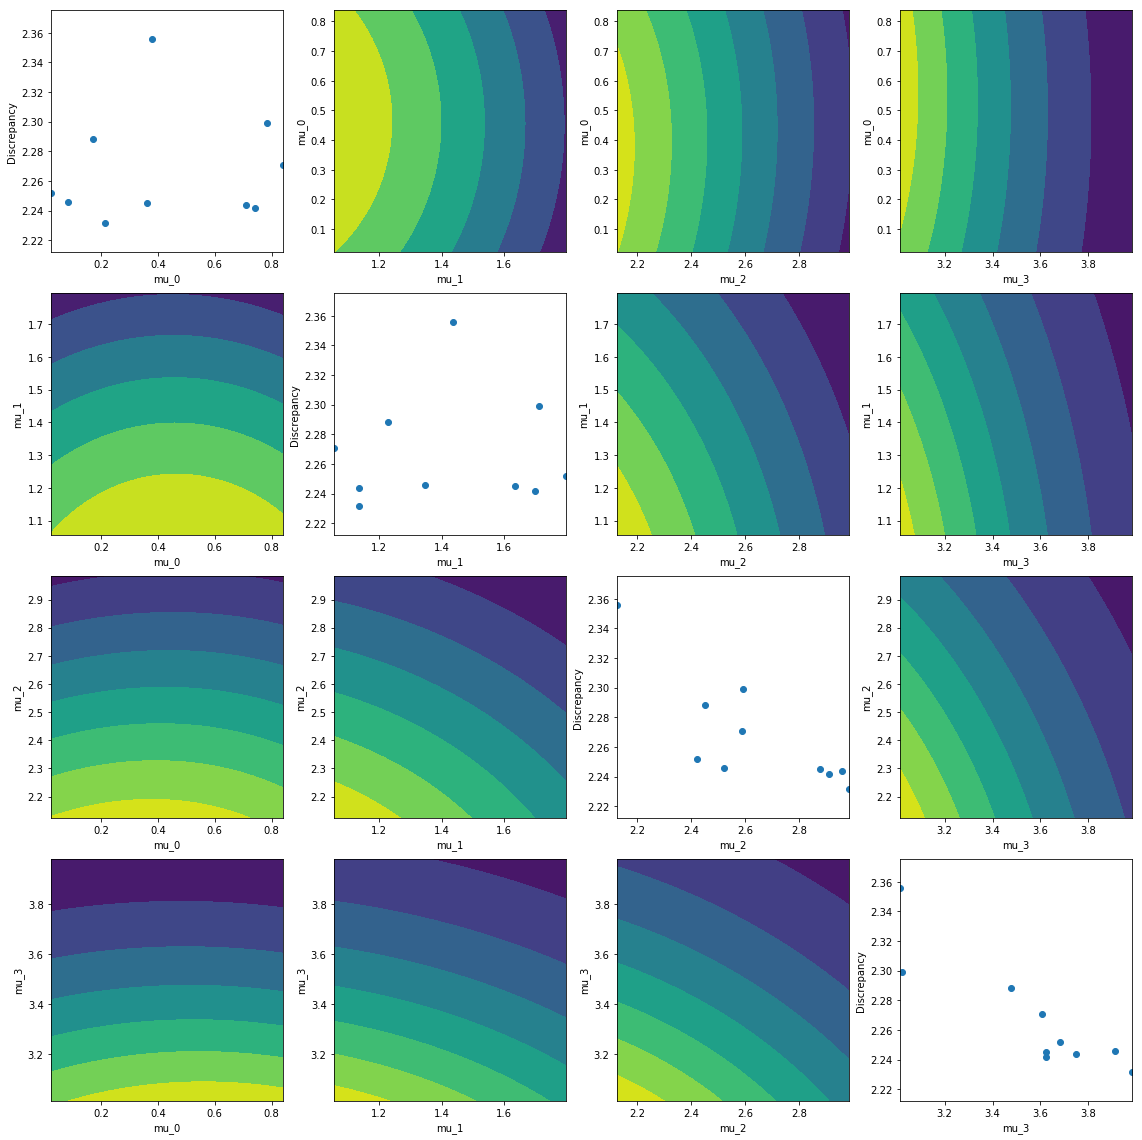

In [56]:
bolfi_4d.plot_gp()

# 5-D Gaussian model

In [57]:
true_mu_5d = [.2, .5, .6, .3, 0.1]
cov_matrix_5d = [[  .1,  -.03,  .03,  .03,  .0], 
                 [-.03,    .1, -.03,  .03,  .03],
                 [ .03,  -.03,   .1, -.03, -.03],
                 [ .03,   .03, -.03,   .1, -.03],
                 [ .0,   .03,  -.03, -.03,   .1]]

In [58]:
m_5d = get_model(true_params=true_mu_5d, nd_mean=True, cov_matrix=cov_matrix_5d, seed_obs=seed)

In [59]:
m_5d.parameter_names

['mu_0', 'mu_1', 'mu_2', 'mu_3', 'mu_4']

In [60]:
rej_5d = elfi.Rejection(m_5d['d'], batch_size=N, seed=seed)

In [61]:
bounds_5d = {'mu_0': (-.25, .25), 
             'mu_1': (-.55, .55), 
             'mu_2': (-.65, .65), 
             'mu_3': (-.35, .35), 
             'mu_4': (-.45, .45)}

In [62]:
gp_5d = elfi.GPyRegression(m_5d.parameter_names, bounds_5d)

In [63]:
prior_5d = elfi.methods.utils.ModelPrior(m_5d)

In [64]:
rej_result_5d = rej_5d.sample(n_samples=n_rejection_samples, quantile = 1)

Progress: |██████████████████████████████████████████████████| 100.0% Complete


In [65]:
bolfi_5d = elfi.BOLFI(m_5d, 'd', batch_size=1, initial_evidence=rej_result_5d.outputs, 
                   update_interval=update_interval, bounds=bounds_5d, seed=scipy.random.seed(), 
                   async=True, target_model=gp_5d)

In [66]:
post = bolfi_5d.fit(n_evidence=fitting_steps)

INFO:elfi.methods.parameter_inference:BOLFI: Fitting the surrogate model...


Progress: |██████████████████████████████████████████████████| 100.0% Complete


INFO:elfi.methods.posteriors:Using optimized minimum value (0.4168) of the GP discrepancy mean function as a threshold


In [67]:
# bolfi_5d.plot_state()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3238657860>,
      dtype=object)

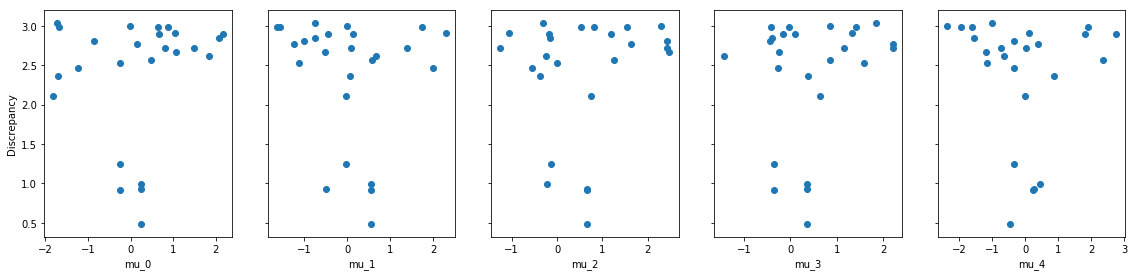

In [68]:
bolfi_5d.plot_discrepancy()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f32385a97b8>,
      dtype=object)

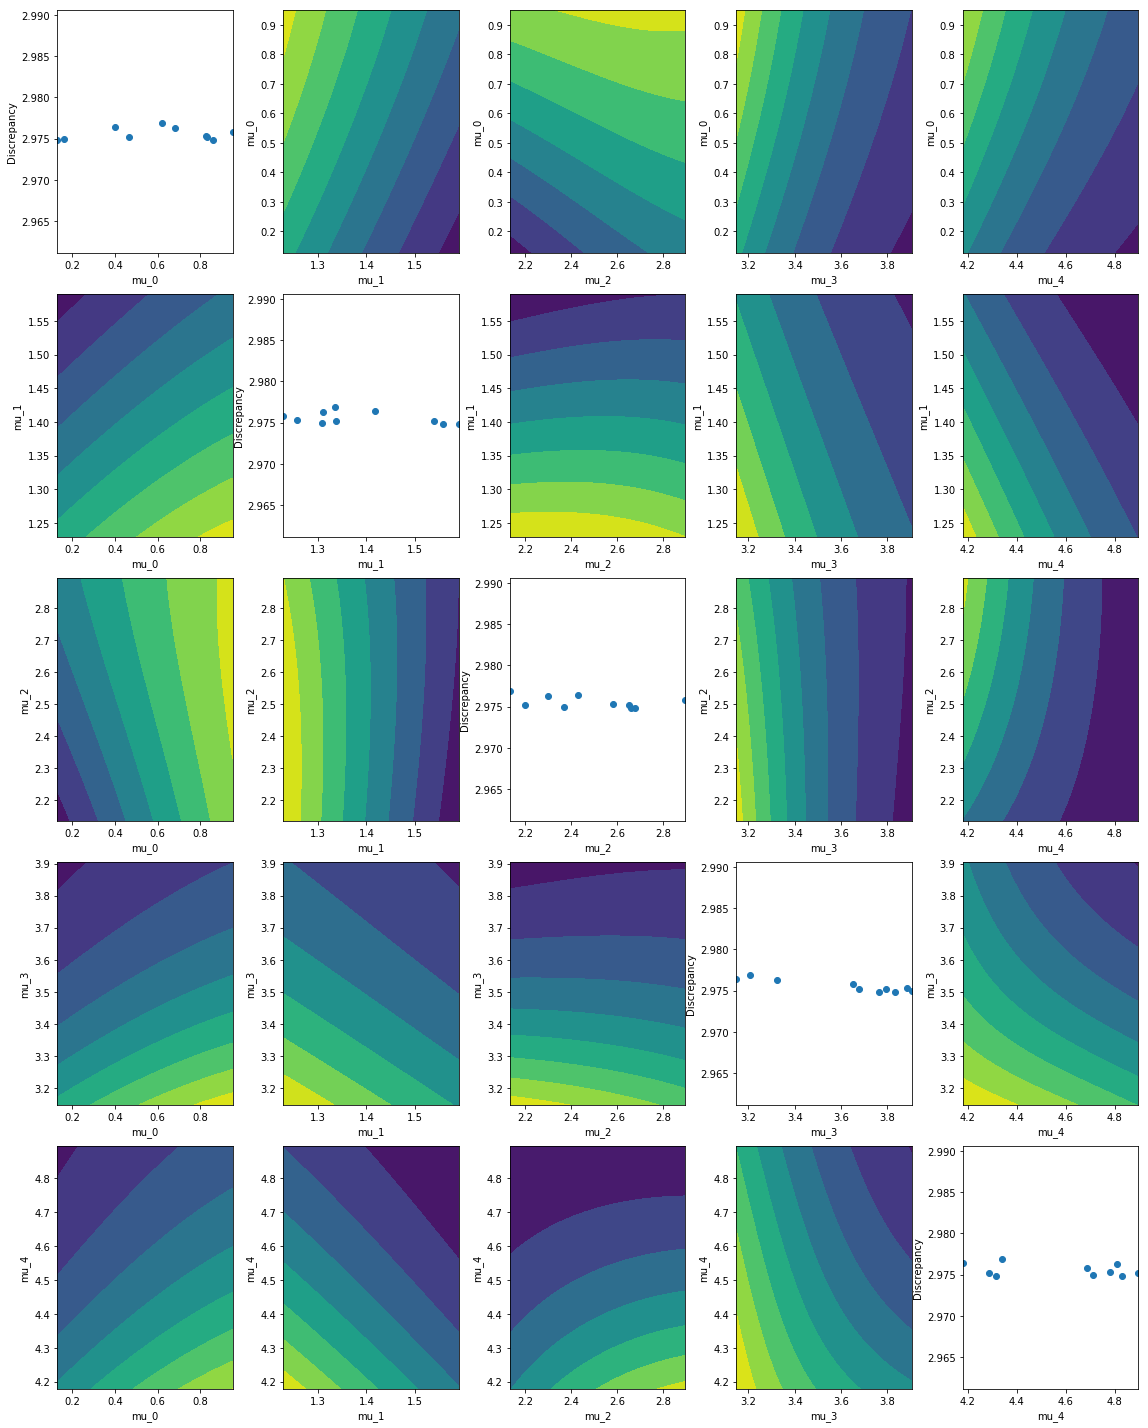

In [69]:
bolfi_5d.plot_gp()

# 6-D Gaussian model

In [70]:
true_mu_6d = [.2, .5, .6, .3, .1, .4]
cov_matrix_6d = [[  .1,  -.03,  .03,  .03,  .03,   .0], 
                 [-.03,    .1, -.03,  .03,  .03,   .03],
                 [ .03,  -.03,   .1, -.03,  .03,   .03],
                 [ .03,   .03, -.03,   .1, -.03,   .03],
                 [ .03,   .03,  .03, -.03,   .1,  -.03],
                 [ .0,   .03,  .03,  .03, -.03,    .1]]

In [71]:
m_6d = get_model(true_params=true_mu_6d, nd_mean=True, cov_matrix=cov_matrix_6d, seed_obs=seed)

In [72]:
m_6d.parameter_names

['mu_0', 'mu_1', 'mu_2', 'mu_3', 'mu_4', 'mu_5']

In [73]:
rej_6d = elfi.Rejection(m_6d['d'], batch_size=N, seed=seed)

In [74]:
bounds_6d = {'mu_0': (-.25, .25), 
             'mu_1': (-.55, .55), 
             'mu_2': (-.65, .65), 
             'mu_3': (-.35, .35), 
             'mu_4': (-.45, .45),
             'mu_5': (-.65, .65)}

In [75]:
gp_6d = elfi.GPyRegression(m_6d.parameter_names, bounds_6d)

In [76]:
prior_6d = elfi.methods.utils.ModelPrior(m_6d)

In [77]:
rej_result_6d = rej_6d.sample(n_samples=n_rejection_samples, quantile = 1)

Progress: |██████████████████████████████████████████████████| 100.0% Complete


In [78]:
bolfi_6d = elfi.BOLFI(m_6d, 'd', batch_size=1, initial_evidence=rej_result_6d.outputs, 
                   update_interval=update_interval, bounds=bounds_6d, seed=scipy.random.seed(), 
                   async=True, target_model=gp_6d)

In [79]:
post = bolfi_6d.fit(n_evidence=fitting_steps)

INFO:elfi.methods.parameter_inference:BOLFI: Fitting the surrogate model...


Progress: |██████████████████████████████████████████████████| 100.0% Complete


INFO:elfi.methods.posteriors:Using optimized minimum value (0.5620) of the GP discrepancy mean function as a threshold


In [80]:
# bolfi_6d.plot_state()

In [81]:
# bolfi_6d.plot_discrepancy()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f323261aeb8>,
      dtype=object)

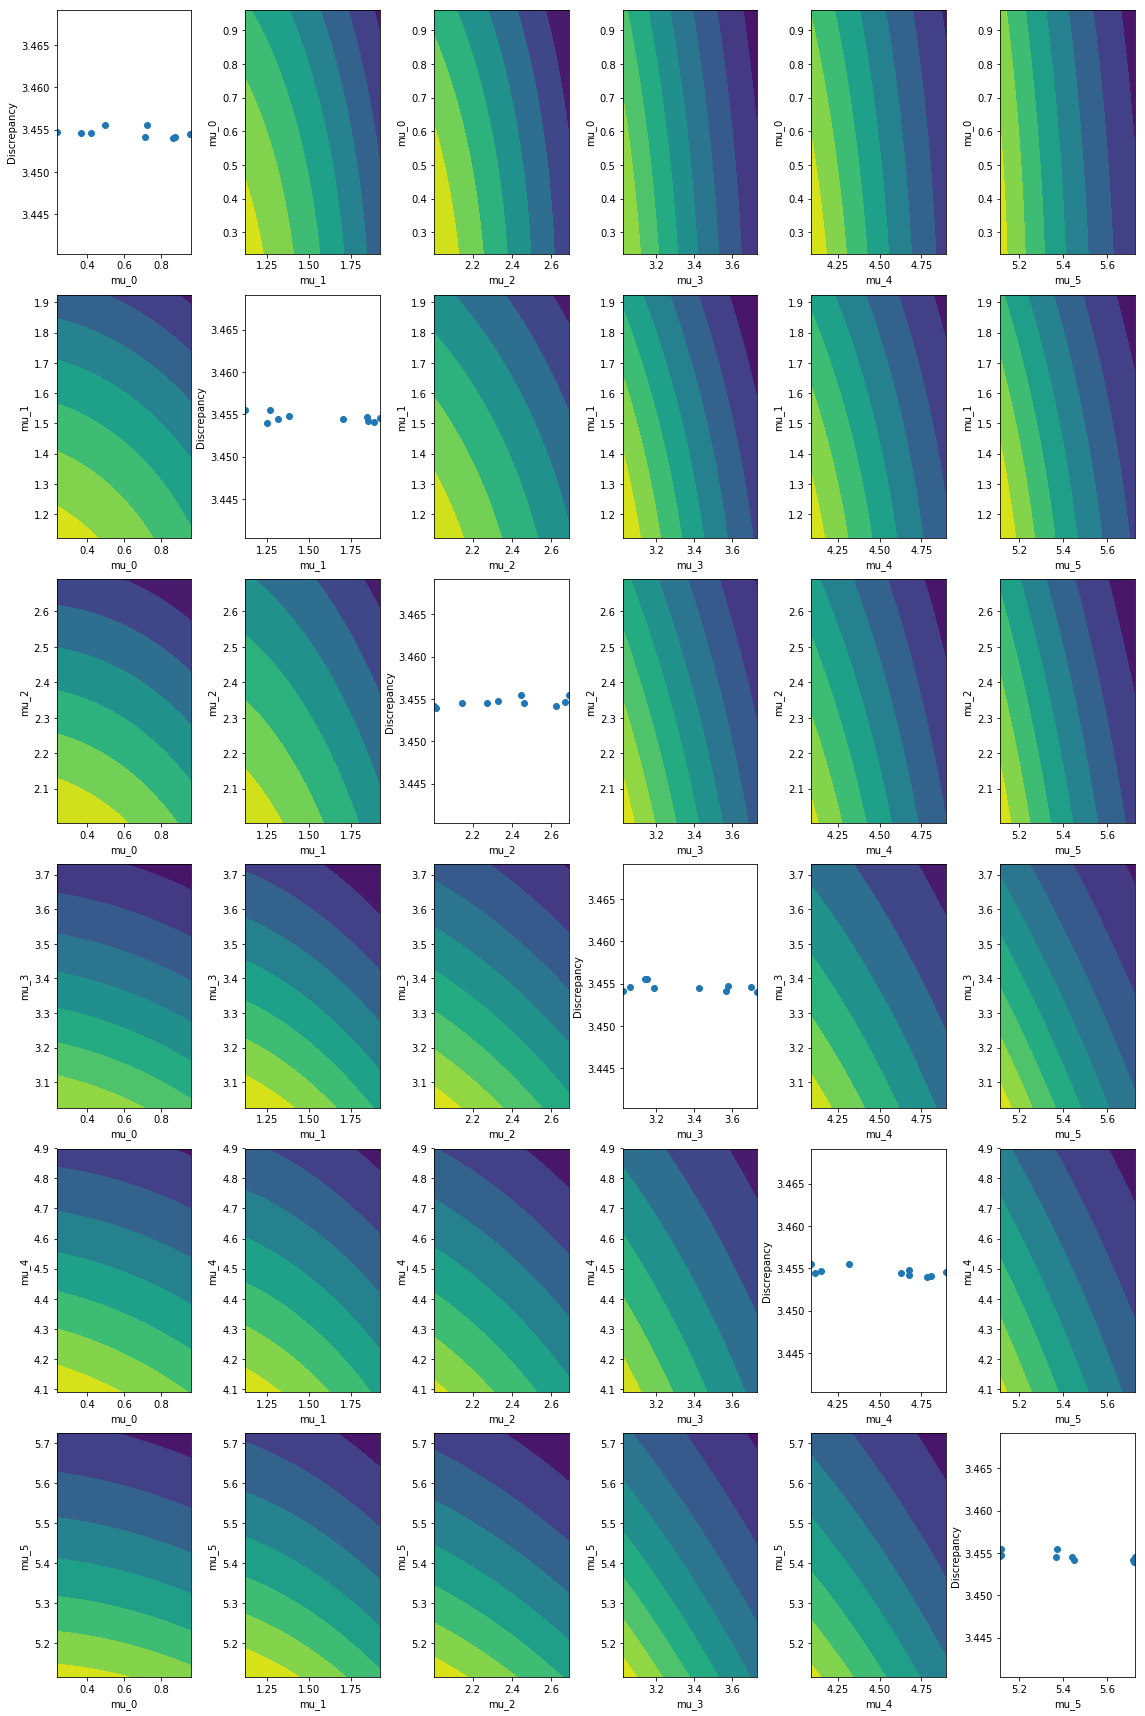

In [82]:
bolfi_6d.plot_gp()

# 7-D Gaussian model

In [83]:
true_mu_7d = [.2, .5, .6, .3, .1, .4, .7]
cov_matrix_7d = [
    [ 2.99561452, -1.40839635, -1.86818786, -0.31814456,  0.5441312 , -2.14063813,  0.71535476],
    [-1.40839635,  1.34716794,  1.14219046,  0.17954718, -0.53016541, 1.27117338, -0.63414694],
    [-1.86818786,  1.14219046,  1.79419079,  0.17773149, -0.50406223, 1.67446536, -0.8146078 ],
    [-0.31814456,  0.17954718,  0.17773149,  0.60281249, -0.15082924, 0.316655  , -0.15892755],
    [ 0.5441312 , -0.53016541, -0.50406223, -0.15082924,  0.81778847, -0.61508787,  0.15310573],
    [-2.14063813,  1.27117338,  1.67446536,  0.316655  , -0.61508787, 2.05214208, -0.53608897],
    [ 0.71535476, -0.63414694, -0.8146078 , -0.15892755,  0.15310573, -0.53608897,  0.94933151]
]

In [84]:
m_7d = get_model(true_params=true_mu_7d, nd_mean=True, cov_matrix=cov_matrix_7d, seed_obs=seed)

In [85]:
m_7d.parameter_names

['mu_0', 'mu_1', 'mu_2', 'mu_3', 'mu_4', 'mu_5', 'mu_6']

In [86]:
rej_7d = elfi.Rejection(m_7d['d'], batch_size=N, seed=seed)

In [87]:
bounds_7d = {'mu_0': (-.25, .25), 
             'mu_1': (-.55, .55), 
             'mu_2': (-.65, .65), 
             'mu_3': (-.35, .35), 
             'mu_4': (-.45, .45),
             'mu_5': (-.65, .65),
             'mu_6': (-.30, .30)}

In [88]:
gp_7d = elfi.GPyRegression(m_7d.parameter_names, bounds_7d)

In [89]:
prior_7d = elfi.methods.utils.ModelPrior(m_7d)

In [90]:
rej_result_7d = rej_7d.sample(n_samples=n_rejection_samples, quantile = 1)

Progress: |██████████████████████████████████████████████████| 100.0% Complete


In [91]:
bolfi_7d = elfi.BOLFI(m_7d, 'd', batch_size=1, initial_evidence=rej_result_7d.outputs, 
                   update_interval=update_interval, bounds=bounds_7d, seed=scipy.random.seed(), 
                   async=True, target_model=gp_7d)

In [92]:
post = bolfi_7d.fit(n_evidence=fitting_steps)

INFO:elfi.methods.parameter_inference:BOLFI: Fitting the surrogate model...


Progress: |██████████████████████████████████████████████████| 100.0% Complete


INFO:elfi.methods.posteriors:Using optimized minimum value (1.0604) of the GP discrepancy mean function as a threshold


In [93]:
# bolfi_7d.plot_discrepancy()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3230b3e668>,
      dtype=object)

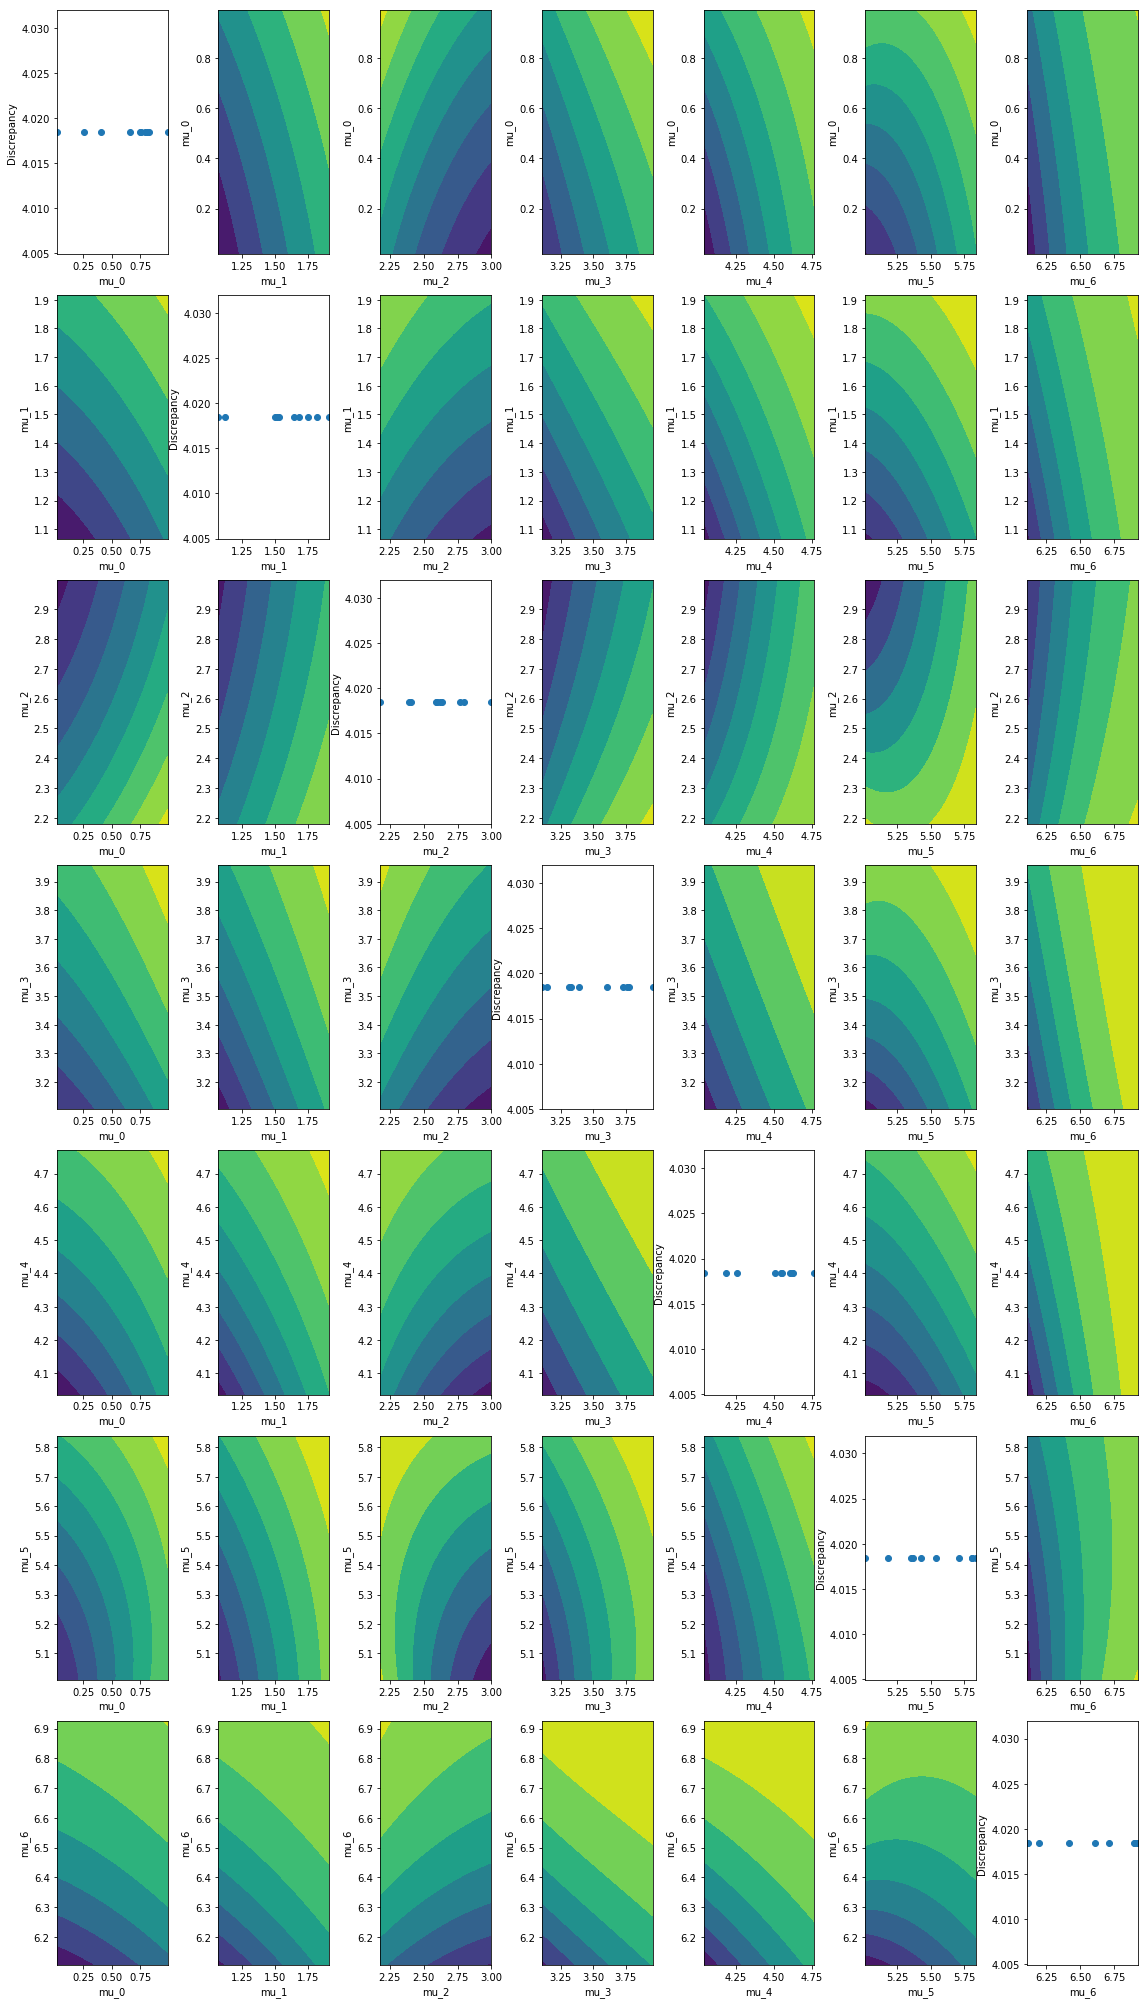

In [94]:
bolfi_7d.plot_gp()

# 8-D Gaussian model

In [95]:
true_mu_8d = [.2, .5, .6, .3, .1, .4, .7, .8]
cov_matrix_8d = [
    [ 0.62191083, -0.02270313,  0.11896504,  0.12435669,  0.10864759, -0.04042299,  0.0167316 , -0.05995579],
    [-0.02270313,  1.21939055,  0.0724539 , -1.19575053, -1.18801009, 0.20948949, -1.14771382,  0.55867238],
    [ 0.11896504,  0.0724539 ,  0.64062287,  0.11373678,  0.00878069, -0.06792819,  0.1618602 ,  0.07047524],
    [ 0.12435669, -1.19575053,  0.11373678,  3.02011035,  2.34219658, -0.19732245,  2.10226711, -1.08625089],
    [ 0.10864759, -1.18801009,  0.00878069,  2.34219658,  2.99580811, -0.27936716,  2.4164742 , -1.12971083],
    [-0.04042299,  0.20948949, -0.06792819, -0.19732245, -0.27936716, 0.64412606, -0.23390011,  0.19834078],
    [ 0.0167316 , -1.14771382,  0.1618602 ,  2.10226711,  2.4164742 , -0.23390011,  2.67045252, -1.00398141],
    [-0.05995579,  0.55867238,  0.07047524, -1.08625089, -1.12971083, 0.19834078, -1.00398141,  1.14352262]
]

In [96]:
m_8d = get_model(true_params=true_mu_8d, nd_mean=True, cov_matrix=cov_matrix_8d, seed_obs=seed)

In [97]:
m_8d.parameter_names

['mu_0', 'mu_1', 'mu_2', 'mu_3', 'mu_4', 'mu_5', 'mu_6', 'mu_7']

In [98]:
rej_8d = elfi.Rejection(m_8d['d'], batch_size=N, seed=seed)

In [99]:
bounds_8d = {'mu_0': (-.25, .25), 
             'mu_1': (-.55, .55), 
             'mu_2': (-.65, .65), 
             'mu_3': (-.35, .35), 
             'mu_4': (-.45, .45),
             'mu_5': (-.65, .65),
             'mu_6': (-.30, .30),
             'mu_7': (-.75, .75)}

In [100]:
gp_8d = elfi.GPyRegression(m_8d.parameter_names, bounds_8d)

In [101]:
prior_8d = elfi.methods.utils.ModelPrior(m_8d)

In [102]:
rej_result_8d = rej_8d.sample(n_samples=n_rejection_samples, quantile = 1)

Progress: |██████████████████████████████████████████████████| 100.0% Complete


In [103]:
bolfi_8d = elfi.BOLFI(m_8d, 'd', batch_size=1, initial_evidence=rej_result_8d.outputs, 
                   update_interval=update_interval, bounds=bounds_8d, seed=scipy.random.seed(), 
                   async=True, target_model=gp_8d)

In [104]:
post = bolfi_8d.fit(n_evidence=fitting_steps)

INFO:elfi.methods.parameter_inference:BOLFI: Fitting the surrogate model...


Progress: |██████████████████████████████████████████████████| 100.0% Complete


INFO:elfi.methods.posteriors:Using optimized minimum value (0.7646) of the GP discrepancy mean function as a threshold


In [105]:
# bolfi_8d.plot_state()

In [106]:
# bolfi_8d.plot_discrepancy()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f322e847e80>,
      dtype=object)

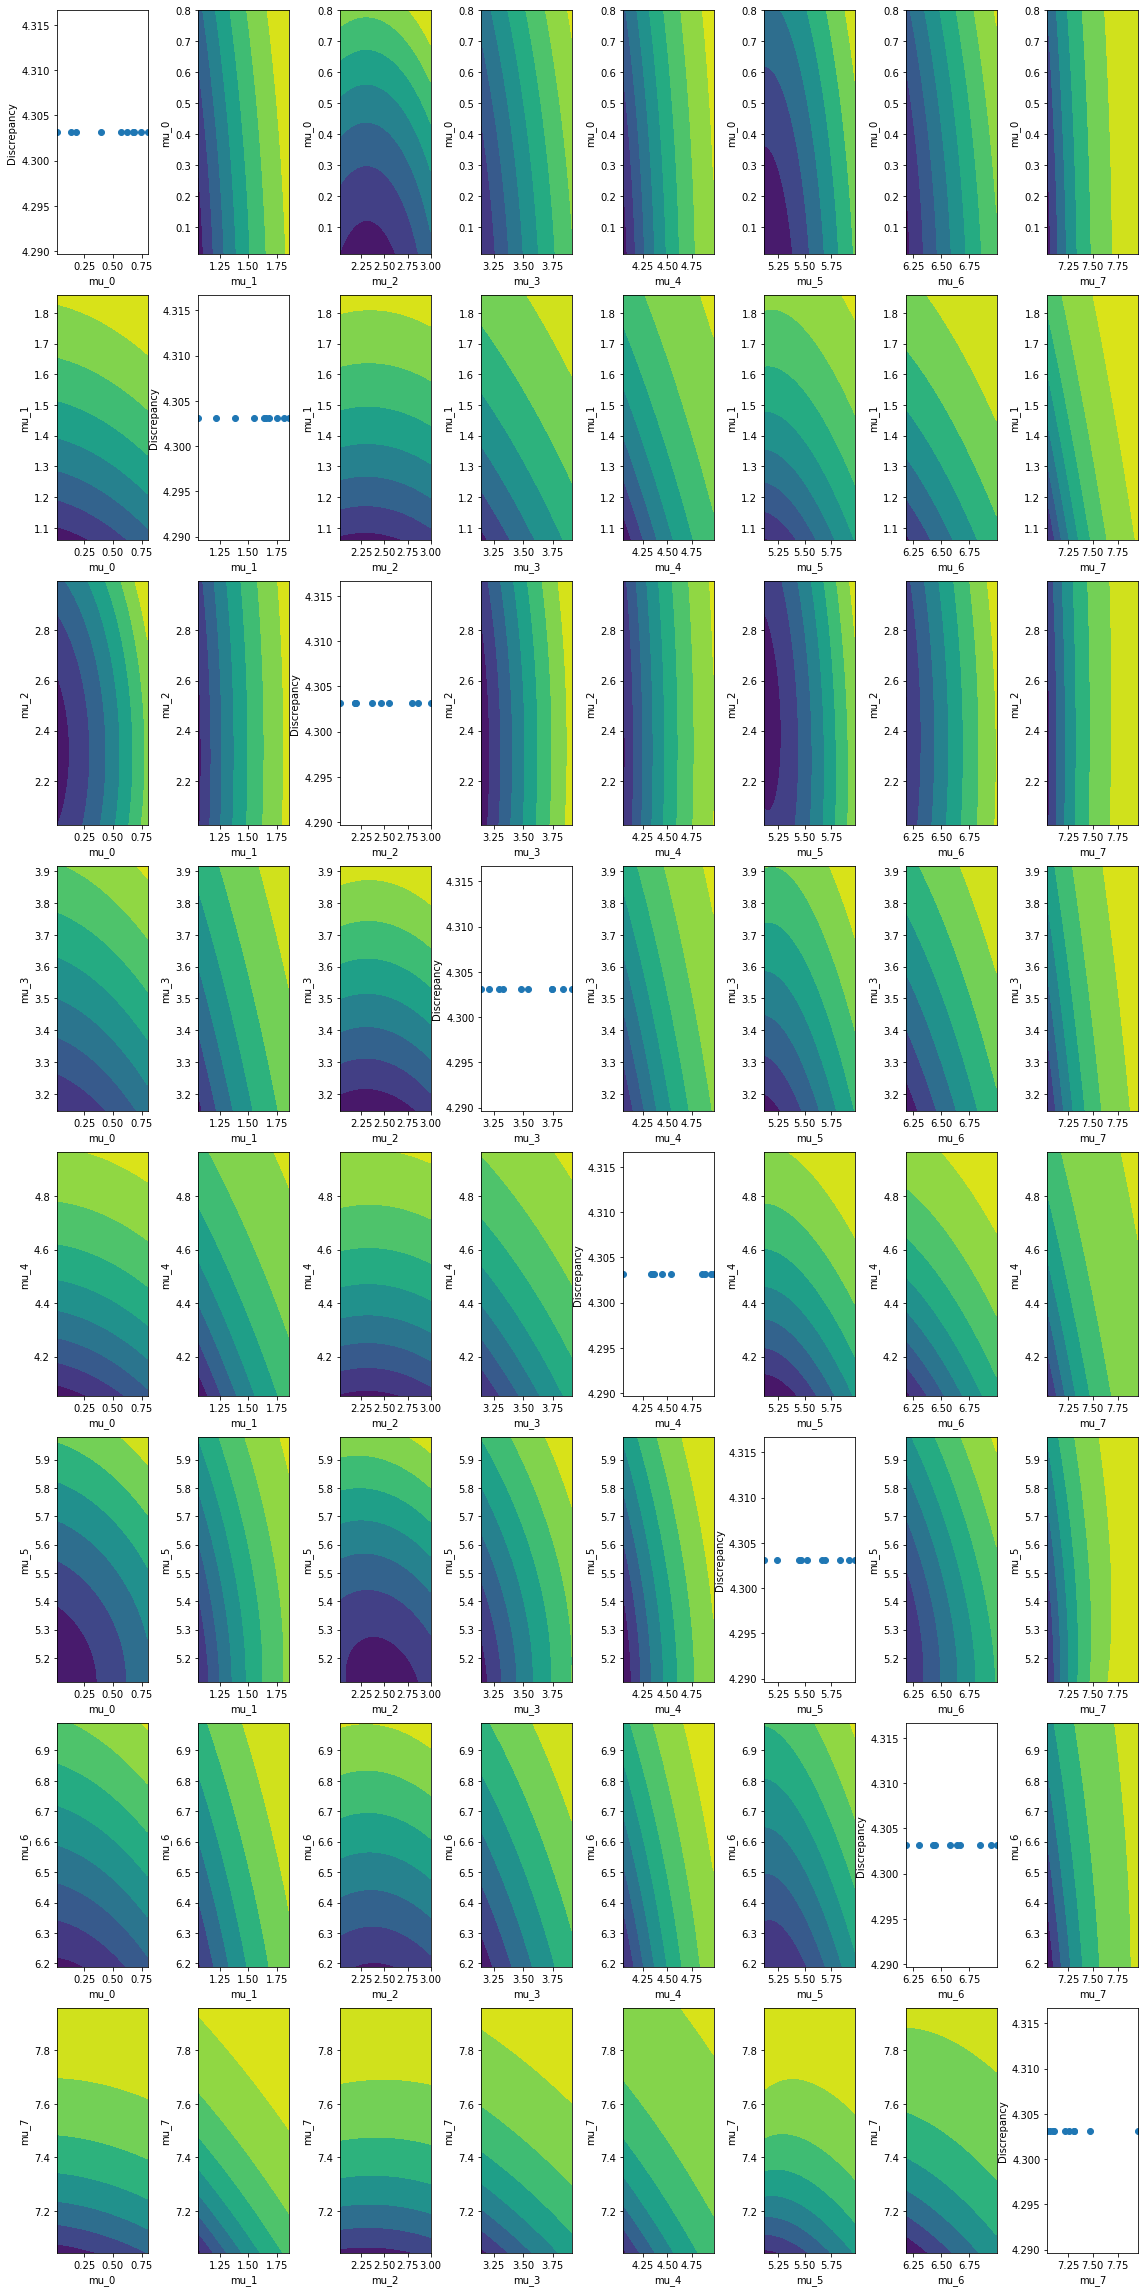

In [107]:
bolfi_8d.plot_gp()